## Analysis of NTSB Aviation Accident data
### Objective
### To analyze aviation accidents , report to identify trends, risk factors and pattern in aviation saftey
## Deliverables
### This includes  non technical reports, jupyter notebook, github repository and interactive dashboard

In [2]:
## import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#load dataset
df = pd.read_csv("AviationData.csv", encoding="latin-1")

c:\Users\Abere\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### lets take a look on data structure

In [4]:

df.head() 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

### Data cleaning and preprocess
#### We will clean the data by:
##### Handle missing 
##### Convert date fields to determine object
##### Rename columns
##### Numerical columns are of different types

In [9]:
### convert date columns to datetime
if 'Publication.Date' in df.columns:
    df['Publication.Date']= pd.to_datetime(df['Publication.Date'],errors='coerce')
if 'Event.Date' in df.columns:
    df['Event.Date']= pd.to_datetime(df['Event.Date'], errors='coerce')

## rename columns
# df.columns =df.columns.str.strip().str.replace ('','_').str.replace('.','_') 

### handle missing values by filiing numerical values with 0 and categorical with unknown
numerical_cols= df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols =df.select_dtypes(include=['object']).columns.tolist()

df[numerical_cols]=df[numerical_cols].fillna(0)
df[categorical_cols]=df[categorical_cols].fillna('unknown')

print("Data cleaning completed")

Data cleaning completed


### Exploratory data analysis(EDA)
#### Analyze accidents trend over time

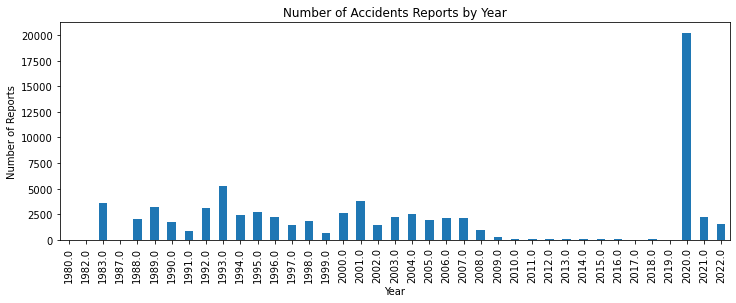

In [10]:
if 'Publication.Date' in df.columns: 
    plt.figure(figsize=(12,4))
    df.groupby(df['Publication.Date'].dt.year).size().plot(kind='bar')
    plt.title("Number of Accidents Reports by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Reports")
    plt.show()
    
    

    

    

### Analyze flights reported frequently having accidents

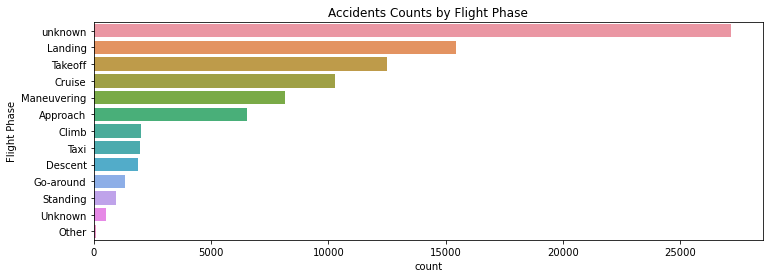

In [11]:
if 'Broad.phase.of.flight'in df.columns:
    plt.figure(figsize=(12,4))
    sns.countplot(y='Broad.phase.of.flight', data=df, order=df['Broad.phase.of.flight'].value_counts().index)
    plt.title("Accidents Counts by Flight Phase") 
    plt.xlabel("count")
    plt.ylabel("Flight Phase")
    plt.show()
else:
    print("Broad.Phase.of.Flight column not found")  



### Weather conditions at the time of accidents

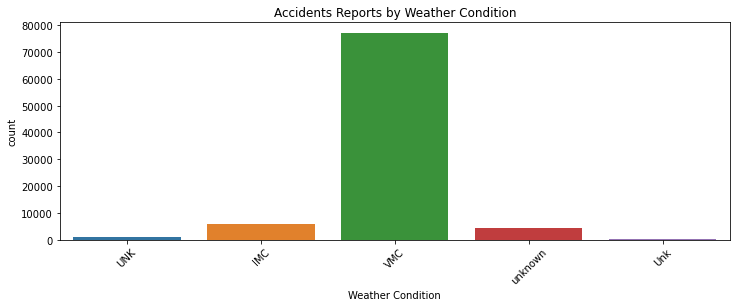

In [12]:
if 'Weather.Condition' in df.columns:
    plt.figure(figsize=(12,4))
    sns.countplot(x='Weather.Condition', data=df)
    plt.title("Accidents Reports by Weather Condition")
    plt.xlabel("Weather Condition")
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Weather.Condition column not found.")    

### Analyze accidents over time

### Analyze counts of different types of injuries i.e (fatal, serious minor)

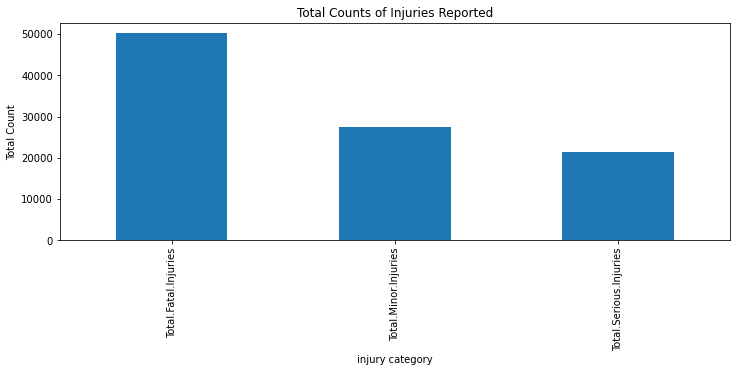

In [13]:
injury_columns=[col for col in df.columns if 'injury'in col or 'Fatal'in col or'Serious'in col or 'Minor'in col]

if injury_columns:
    injury_data = df[injury_columns].sum().sort_values(ascending=False)
    plt.figure(figsize=(12,4))
    injury_data.plot(kind='bar')
    plt.title("Total Counts of Injuries Reported")
    plt.xlabel("injury category")
    plt.ylabel("Total Count")
    plt.show()
else:
    print("No injury related columns found.")    

## Conclusion
## Insight to data analysis :
### Flight phase risk - takeoff was the most accident prone phase
### Weather impact-accidents under instrument meteorological conditions had high fatality rates
### Impact of injuries- total fatal injuries had the most total counts
### Accidents trend over time - in the year 2020 had the most accidents

## Data limitations
### There might discrepancies of data sources lowering its accuracy
### This data may not cover seasonal variations over time
### Data may not have detailed information for example pilot experience

## Next steps to be taken is :
### Build a classifier to predict accidents severity (total_fatal_injuries) using features like weather_conditions and broad_phase_of_flight 

## Recommendations
### Focus on takeoff training of pilots
### Mandatory reporting of minor injuries to improve the data